Mean waiting time: 0.07
Mean time in system: 0.59
Server utilization: 0.80


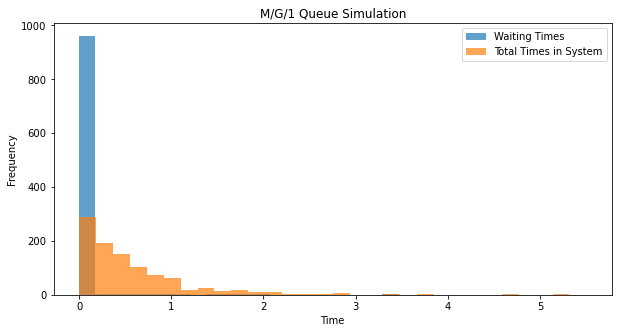

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # For reproducibility
arrival_rate = 1.5# Lambda (arrivals per time unit)
service_rate = 2.0# Mu (service completions per time unit)
num_customers = 1000# Generate inter-arrival times and service times
inter_arrival_times = np.random.exponential(1/arrival_rate, num_customers)
service_times = np.random.exponential(1/service_rate, num_customers)

# Arrival times
arrival_times = np.cumsum(inter_arrival_times)

# Start service times
start_service_times = np.maximum(arrival_times, np.roll(np.cumsum(service_times), 1))
start_service_times[0] = arrival_times[0]  # The first customer is served immediately# Departure times
departure_times = start_service_times + service_times

# Calculate performance metrics
waiting_times = start_service_times - arrival_times
total_times_in_system = departure_times - arrival_times
mean_waiting_time = np.mean(waiting_times)
mean_total_time_in_system = np.mean(total_times_in_system)
server_utilization = np.sum(service_times) / departure_times[-1]

print(f"Mean waiting time: {mean_waiting_time:.2f}")
print(f"Mean time in system: {mean_total_time_in_system:.2f}")
print(f"Server utilization: {server_utilization:.2f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(waiting_times, bins=30, alpha=0.7, label='Waiting Times')
plt.hist(total_times_in_system, bins=30, alpha=0.7, label='Total Times in System')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('M/G/1 Queue Simulation')
plt.show()


In [2]:
start_service_times

array([3.12845393e-01, 2.31959301e+00, 3.19742348e+00, 3.80605185e+00,
       3.91913509e+00, 4.03219929e+00, 4.07209180e+00, 5.41291238e+00,
       6.02563381e+00, 6.84646719e+00, 6.86033339e+00, 9.19603837e+00,
       1.03869914e+01, 1.05461165e+01, 1.06799025e+01, 1.08149768e+01,
       1.12497699e+01, 1.15527645e+01, 1.19297892e+01, 1.30043804e+01,
       1.30216482e+01, 1.36193534e+01, 1.37958009e+01, 1.50869252e+01,
       1.68581602e+01, 1.83017470e+01, 1.86231777e+01, 1.96135831e+01,
       2.05442967e+01, 2.07364670e+01, 2.16192657e+01, 2.16381206e+01,
       2.20916250e+01, 2.22223131e+01, 2.22865520e+01, 2.23265896e+01,
       2.29224286e+01, 2.31300916e+01, 2.37751598e+01, 2.38089548e+01,
       2.39983350e+01, 2.43860467e+01, 2.51680954e+01, 2.58721600e+01,
       2.60717985e+01, 2.69372956e+01, 2.74156738e+01, 2.75482817e+01,
       2.80618899e+01, 2.85811242e+01, 3.05266870e+01, 3.15215173e+01,
       3.33915802e+01, 3.48930149e+01, 3.55003845e+01, 3.72000081e+01,
      

In [9]:
#Processor sharing
import numpy as np
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # For reproducibility
process_count = 3# Number of processes
arrival_rates = [0.5, 1.0, 1.5]  # Different arrival rates for each process
service_rate = 2.0# Mu (service completions per time unit)
total_requests = 1000# Total number of requests to simulate# Generate inter-arrival times and service times for each process
inter_arrival_times = [np.random.exponential(1/arrival_rate, total_requests) for arrival_rate in arrival_rates]
service_times = [np.random.exponential(1/service_rate, total_requests) for _ inrange(process_count)]

# Concatenate and sort all arrivals
arrival_times = np.concatenate([np.cumsum(inter_arrival_times[i]) for i inrange(process_count)])
service_requirements = np.concatenate(service_times)
process_ids = np.concatenate([[i] * total_requests for i inrange(process_count)])

# Sort by arrival times
sorted_indices = np.argsort(arrival_times)
arrival_times = arrival_times[sorted_indices]
service_requirements = service_requirements[sorted_indices]
process_ids = process_ids[sorted_indices]

# Initialize variables
time = 0
active_requests = []
departure_times = np.zeros(len(arrival_times))
current_service_rate = 0
# Simulation loop
for i in range(len(arrival_times)):
# Update the current time to the arrival of the next request
    time = arrival_times[i]
    
    # Remove completed requests before this timeif active_requests:
    active_requests = [(arrival, remaining - (time - prev_time) * current_service_rate / len(active_requests), pid)
                           for (arrival, remaining, pid) in active_requests if remaining > (time - prev_time) * current_service_rate / len(active_requests)]
    
    # Add the new request to the active set
    active_requests.append((arrival_times[i], service_requirements[i], process_ids[i]))
    
    # Calculate the time when the request would leave if it got the full attention of the serverfor j, (arrival, remaining, pid) inenumerate(active_requests):
        # Calculate the departure time given the remaining service time and number of active requestsif remaining <= 0:
            departure_times[sorted_indices[i]] = time
            active_requests.pop(j)
    else:
        current_service_rate = service_rate
    
    prev_time = time

# Calculate performance metrics
total_times_in_system = departure_times - arrival_times
mean_total_time_in_system = np.mean(total_times_in_system)
server_utilization = np.sum(service_requirements) / time

print(f"Mean time in system: {mean_total_time_in_system:.2f}")
print(f"Server utilization: {server_utilization:.2f}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(total_times_in_system, bins=30, alpha=0.7, label='Total Times in System')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.title('Processor Sharing Simulation')
plt.show()


SyntaxError: invalid syntax (<ipython-input-9-94670700bbe6>, line 11)